# <span style="color:orange">Wrangling</span>

In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import seaborn as sns
from mlxtend.evaluate import lift_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from pathlib import Path
import requests
import pandas_profiling
from pandas_profiling.utils.cache import cache_file

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn-Kaggle.csv')

In [2]:
display(df.head(5))

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [1077]:
# Early wrangling
df.isnull().sum()
# Data converting
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
# Removing missing values 
df.dropna(inplace = True)

In [1078]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


In [4]:
# panda profiling
%load_ext autoreload
%autoreload 2

In [5]:
report = df.profile_report(sort='None', html={'style':{'full_width': True}}, progress_bar=False)
report

# <span style="color:orange">EDA</span>

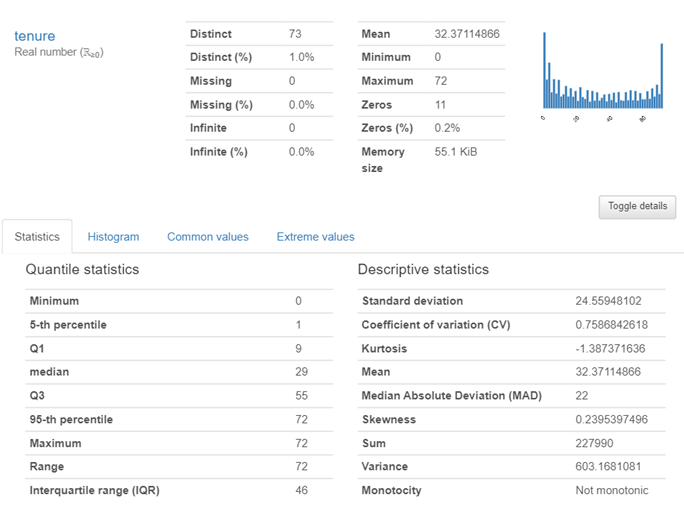

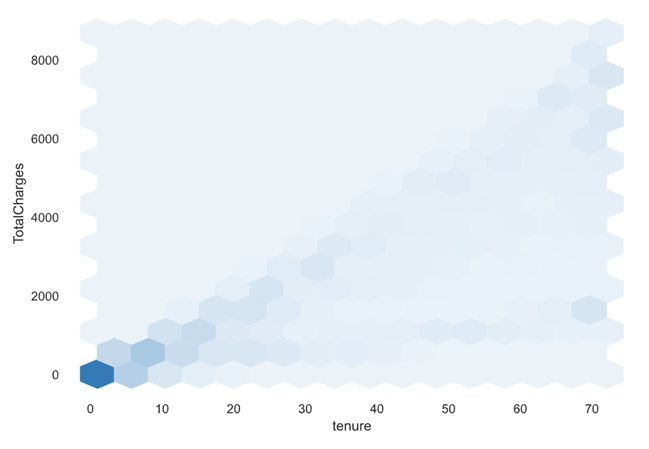

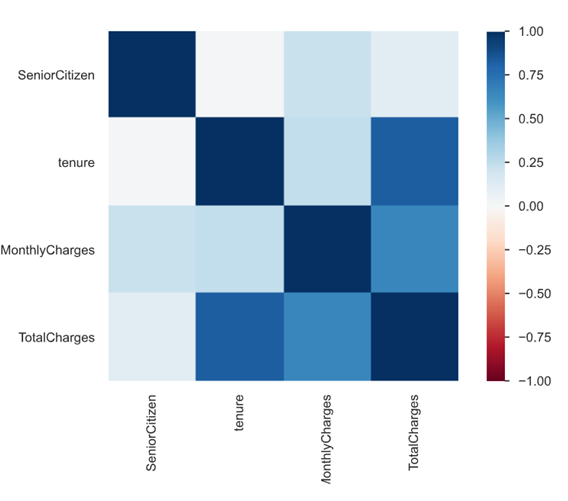

# Phik correlation, due to many categorical values

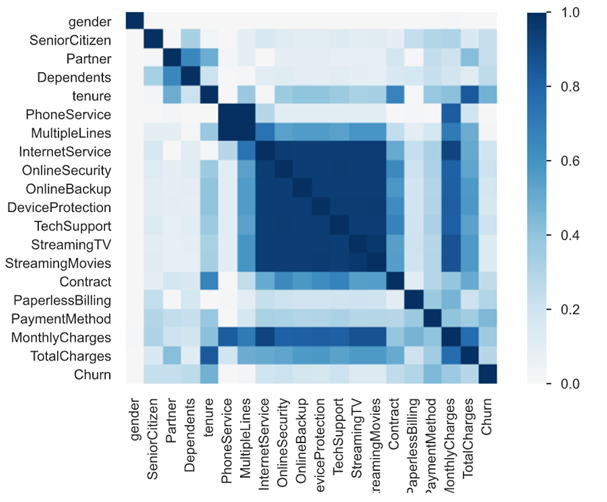

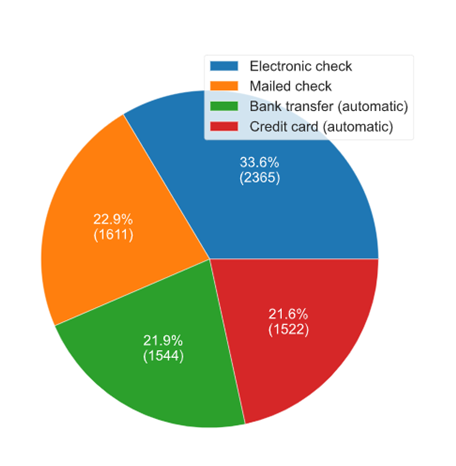

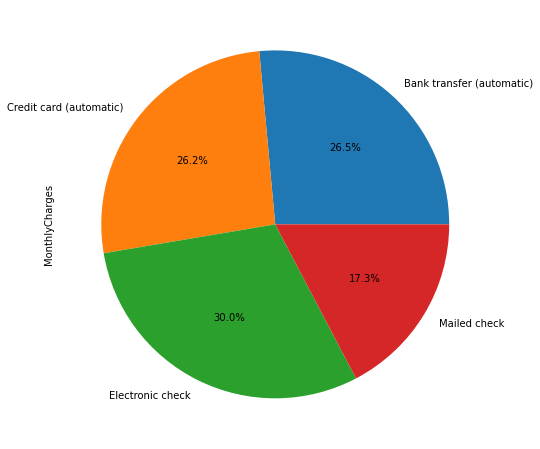

In [262]:
df1=df.groupby('PaymentMethod')['MonthlyCharges'].mean()
df1.plot.pie(figsize=(8,8), autopct='%1.1f%%')

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

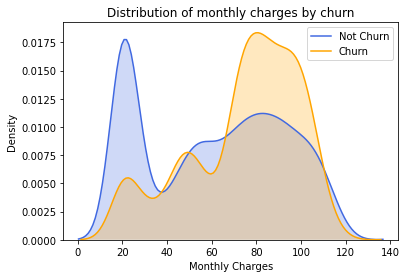

In [263]:
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Royalblue", shade = True)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Orange", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

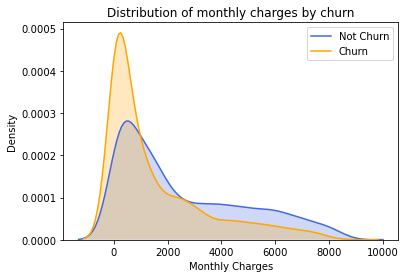

In [264]:
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],
                color="Royalblue", shade = True)
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Orange", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

Text(0.5, 1.0, 'Tenure distribution by churn')

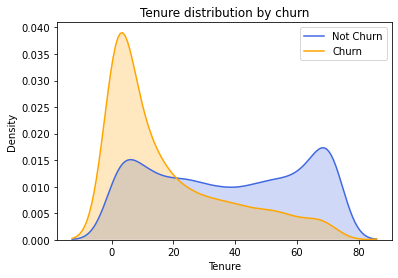

In [265]:
ax = sns.kdeplot(df.tenure[(df["Churn"] == 'No') ],
                color="Royalblue", shade = True)
ax = sns.kdeplot(df.tenure[(df["Churn"] == 'Yes') ],
                ax =ax, color="Orange", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Tenure')
ax.set_title('Tenure distribution by churn')

In [266]:
# print("Number of rows: ", df.shape[0])
# counts = df.describe().iloc[0]
# display(
#     pd.DataFrame(
#         counts.tolist(), 
#         columns=["Count of values"], 
#         index=counts.index.values
#     ).transpose()
# )

# <span style="color:orange">Preprocessing</span>

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7032 non-null object
gender              7032 non-null object
SeniorCitizen       7032 non-null int64
Partner             7032 non-null object
Dependents          7032 non-null object
tenure              7032 non-null int64
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null object
dtypes: float64(2), int64(2), ob

# <span style="color:red">Feature engineering with compound score</span>

In [1079]:
df['Compound']=df['Churn'].apply(lambda x: np.random.uniform(-0.8, 0.3) if x=='Yes' else np.random.uniform(-0.3, 0.5))
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Compound
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0.394505
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,-0.052606
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,-0.651140
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0.282080
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,-0.261350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,-0.282755
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,-0.211640
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0.174108
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,-0.206665


In [1080]:
# Drop the columns that we have decided won't be used in prediction
#df = df.drop(["Phone", "Area Code", "State"], axis=1)
df = df.drop(['customerID'], axis=1)
#Converting the predictor variable in a binary numeric variable
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)


In [1081]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
Compound            float64
dtype: object

In [1082]:
#Let's convert all the categorical variables into dummy variables
dfd = pd.get_dummies(df)

features = dfd.drop(["Churn"], axis=1).columns

features

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Compound',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_

In [1083]:
# We will use the data frame where we had created dummy variables
y = dfd['Churn'].values
X = dfd.drop(columns = ['Churn'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features
X

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Compound,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.000000,0.115423,0.001275,0.919165,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.464789,0.385075,0.215867,0.574905,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.014085,0.354229,0.010310,0.114056,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.619718,0.239303,0.210241,0.832602,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.014085,0.521891,0.015330,0.414180,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.0,0.323944,0.662189,0.227521,0.397699,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7028,0.0,1.000000,0.845274,0.847461,0.452455,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7029,0.0,0.140845,0.112935,0.037809,0.749467,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7030,1.0,0.042254,0.558706,0.033210,0.456286,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [1084]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
X_train

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Compound,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
850,0.0,0.014085,0.065672,0.004985,0.448276,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2122,0.0,0.549296,0.239801,0.195898,0.817103,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
596,0.0,0.042254,0.470647,0.025202,0.550194,0.0,1.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
206,0.0,1.000000,0.370149,0.480083,0.660960,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
5006,1.0,0.985915,0.338806,0.432293,0.567184,0.0,1.0,0.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,0.0,0.211268,0.560199,0.132899,0.804721,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5695,0.0,0.253521,0.682587,0.178352,0.669374,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1361,0.0,0.126761,0.670149,0.091744,0.454586,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1547,0.0,0.422535,0.619900,0.283037,0.646909,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


# <span style="color:orange">EDA with Widgets</span>

A this point we can construct our model. The first thing to do is split our dataset into training and test sets. We will take a simple approach and take a 75:25 randomly sampled split.

In [310]:
# profile_report = X.profile_report(explorative=True, html={'style': {'full_width': True}})
# profile_report

In [1100]:
# profile_report.to_widgets()
X_train.loc[:, ['SeniorCitizen','Compound']]

,SeniorCitizen,Compound
850,0.0,0.448276
2122,0.0,0.817103
596,0.0,0.550194
206,0.0,0.660960
5006,1.0,0.567184
...,...,...
599,0.0,0.804721
5695,0.0,0.669374
1361,0.0,0.454586
1547,0.0,0.646909


# <span style="color:red">One Hot Encoding</span>

In [856]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn-Kaggle.csv')

df['TotalCharges'] = df.TotalCharges.replace({' ': 0})
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
# remove the 9 rows with missing values
#print(df.info())

df = df.drop('customerID', axis=1)

df['Churn'] = df.Churn.replace({'No': 0, 'Yes':1})

from sklearn.model_selection import train_test_split
X = df.drop(columns = ['Churn'])
y = df.Churn

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=df.Churn, 
                                                    test_size=0.2, random_state=123)

from sklearn.preprocessing import OneHotEncoder, StandardScaler

# generate the list of categorical and numerical variables
categorical_variables = df.nunique()[df.nunique() < 5].keys().to_list()

numerical_variables=list(set(df.columns) - set(categorical_variables))
categorical_variables.remove('Churn')

ohe = OneHotEncoder(drop='first', sparse=False)

X_train_ohe = ohe.fit_transform(X_train[categorical_variables])
X_train_ohe_df = pd.DataFrame(X_train_ohe, columns=ohe.get_feature_names(categorical_variables))

# Transform only without fitting
X_test_ohe = ohe.transform(X_test[categorical_variables])
X_test_ohe_df = pd.DataFrame(X_test_ohe, columns=ohe.get_feature_names(categorical_variables))


scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train[numerical_variables])
X_train_sc_df = pd.DataFrame(X_train_sc, columns=numerical_variables)

# Transform only without fitting
X_test_sc = scaler.transform(X_test[numerical_variables])
X_test_sc_df = pd.DataFrame(X_test_sc, columns=numerical_variables)

# Merging the transformed dataframe togheter
X_train = pd.merge(X_train_ohe_df, X_train_sc_df, left_index=True, right_index=True)
X_test = pd.merge(X_test_ohe_df, X_test_sc_df, left_index=True, right_index=True)
X_train

,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TotalCharges,MonthlyCharges,tenure
0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,-0.203187,-1.320165,1.623266
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.970380,0.212637,-1.272319
2,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.274410,-1.345156,1.500917
3,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.559400,1.142314,1.052305
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.136860,0.322598,-0.293530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.481522,-1.330161,0.522128
5630,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.632459,1.357239,0.073516
5631,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.568990,1.242279,0.195865
5632,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.474057,-0.180560,-0.497444


In [256]:
#df_train, df_test = train_test_split(dfd, test_size=0.2)
X_train.to_csv('X_train.csv')
X_test.to_csv('X_test.csv')

In [15]:
y_test

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [16]:
# from sklearn.metrics import accuracy_score
# model = RandomForestClassifier()
# model.fit(X_train[features], y_train)
# preds = model.predict(X_test[features])
# accuracy_score(y_test, preds)
# from sklearn.metrics import accuracy_score
model = RandomForestClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)
accuracy_score(y_test, preds)

NameError: name 'accuracy_score' is not defined

Once we have obtained our split we can use the RandomForestClassifier() from the sklearn library as our model. We initialise our model, fit it to our dataset using the fit() method, then simply make our predictions using the predict() method.

In [994]:
# Set up our RandomForestClassifier instance and fit to data
#clf = RandomForestClassifier(n_estimators=30)
clf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
clf.fit(X_train, y_train)

# Make predictions
#predictions = clf.predict(df_test[features])
predictions = (clf.predict_proba(X_test)[:,1] >= 0.5).astype(int)
probs = clf.predict_proba(X_test)
display(predictions)

array([0, 0, 0, ..., 0, 0, 0])

In [995]:
# probs = clf.predict_proba(df_test[features])
# pr=pd.DataFrame(data=probs)
# df_test['pr']=pr[1]
X_test

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Compound,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4246,0.0,0.295775,0.701493,0.215365,0.725383,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2909,0.0,0.436620,0.463682,0.229881,0.499186,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1564,0.0,0.197183,0.279104,0.071619,0.696787,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5218,0.0,0.084507,0.775622,0.071648,0.713931,0.0,1.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4419,0.0,0.676056,0.819900,0.565307,0.715341,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,0.0,0.042254,0.662189,0.040745,0.563564,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
914,1.0,0.309859,0.568657,0.187486,0.474124,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4902,0.0,0.408451,0.667662,0.289822,0.801163,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1250,1.0,0.760563,0.701990,0.552331,0.522891,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [996]:
y_test

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)


Given the ease of setting up a basic model, a common approach is to initialise and train a variety of different models and pick the most performant one as a starting point. 

For example, we might also choose to run a support vector machine and a neural network alongside our random forest and then select the best performing of them to refine.


If we display the results we can see we have a list of booleans (0's and 1's) representing whether or not our model thinks a customer has churned or not. Now we can compare this to whether they actually churned to evaluate our model. We could also compute the actual probabilities of a customer churning using predict_proba() rather than just simple yes / no. We could then use these probabilities as a threshold for driving business decisions around which customers we need to target for retention, and how strong an incentive we need to offer them.
We can achieve the comparison mentioned above by using the .score() method, and displaying that we can see that we have achieved an accuracy of over 90%, which is not bad for our first attempt.


In [997]:
score = clf.score(X_test, y_test)
print("Accuracy: ", score)

Accuracy:  0.8813077469793887


In [998]:
from xgboost import XGBClassifier
clf = XGBClassifier(n_estimators=30)
clf.fit(X_train, y_train)

# Make predictions
predictions = clf.predict(X_test)
probs = clf.predict_proba(X_test)
display(predictions)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [999]:
score = clf.score(X_test, y_test)
print("Accuracy: ", score)

Accuracy:  0.8891257995735607


In [1000]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=30)
clf.fit(X_train, y_train)

# Make predictions
predictions = clf.predict(X_test)
probs = clf.predict_proba(X_test)
display(predictions)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [1001]:
score = clf.score(X_test, y_test)
print("Accuracy: ", score)

Accuracy:  0.8848614072494669


# <span style="color:red">Threshold manipulation with Linear Regression</span>

In [1067]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train)

# Make predictions
predictions = clf.predict(X_test)
#probs = clf.predict_proba(df_test[features])
display(predictions)

array([ 0.65039062, -0.03320312,  0.50195312, ...,  0.10546875,
        0.06640625, -0.12109375])

In [1068]:
pd1=pd.DataFrame(data=predictions)
#pd.to_csv('pd.csv') 
pd2=(pd1.iloc[:,:]>0.4).astype('int64')
pd3=pd2[0].values.tolist()
predictions=np.array(pd3)
predictions
# score = clf.score(df_test[features], df_test["Churn"])
# print("Accuracy: ", score)

array([1, 0, 1, ..., 0, 0, 0])

In [1069]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, predictions, squared=False) #RMSE

0.389083445426981

We can also construct a confusion matrix and and a ROC curve to dig further into the quality of our results. In a more rigorous exercise part of this stage would be to determine the most suitable scoring metric/s for our situation, undertake more robust checks of our chosen metrics, and attempt to reduce / avoid issues such as over-fitting by using methods such as k-fold cross validation.

# <span style="color:orange">Modeling</span>

,Predicted False,Predicted True
Actual False,920,132
Actual True,81,274


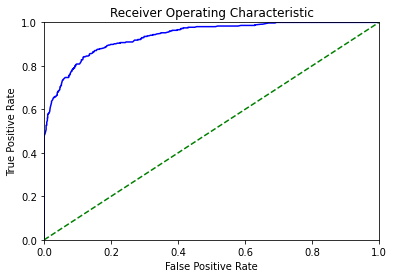

In [1070]:
get_ipython().magic('matplotlib inline')
confusion_matrix = pd.DataFrame(
    confusion_matrix(y_test, predictions), 
    columns=["Predicted False", "Predicted True"], 
    index=["Actual False", "Actual True"]
)
display(confusion_matrix)

# Calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = roc_curve(y_test, probs[:,1])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1],'g--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

We can also plot feature importance to gain some insight as to what features were most useful in our model, which will be of great help when refining our model in the future.

2.6219284940411702


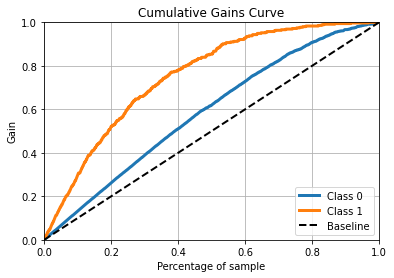

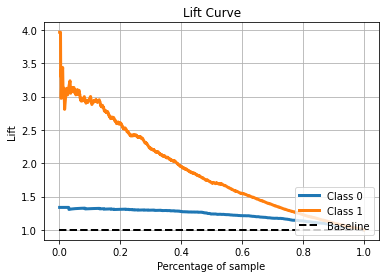

In [33]:
print(lift_score(y_test, predictions))
import matplotlib.pyplot as plt
import scikitplot as skplt

#Y_test_pred_ = model.predict_proba(X_test_df)[:]

probs=clf.predict_proba(X_test)

skplt.metrics.plot_cumulative_gain(y_test, probs)
plt.show()

skplt.metrics.plot_lift_curve(y_test, probs)
plt.show()
# CLASS?`
# HOW TO EXTRACT THE TOP QUARTILE?
# skplt.estimators.plot_feature_importances(clf, feature_names=df_test.columns,..........
# QCUT, Encoding.Normalize

# <span style="color:red">Lift score</span>

In [216]:
#df_test['probs']=probs[1]
p1=pd.DataFrame(data=probs)
p1[1]
X_test.reset_index(drop=True, inplace=True)
X_test
X_test['p1']=p1[1]
X_test['q']=pd.qcut(df_test['p1'], q=5)
X_test

C:\Users\emreo\miniconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\emreo\miniconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Compound,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,p1,q
0,0.0,0.295775,0.701493,0.215365,0.494959,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.548806,"(0.475, 0.819]"
1,0.0,0.436620,0.463682,0.229881,0.335193,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.120292,"(0.121, 0.263]"
2,0.0,0.197183,0.279104,0.071619,0.418735,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.391222,"(0.263, 0.475]"
3,0.0,0.084507,0.775622,0.071648,0.606877,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.650860,"(0.475, 0.819]"
4,0.0,0.676056,0.819900,0.565307,0.317742,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.136640,"(0.0555, 0.121]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1402,0.0,0.042254,0.662189,0.040745,0.117113,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.929962,"(0.475, 0.819]"
1403,1.0,0.309859,0.568657,0.187486,0.845000,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.033443,"(0.263, 0.475]"
1404,0.0,0.408451,0.667662,0.289822,0.001566,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.944294,"(0.0555, 0.121]"
1405,1.0,0.760563,0.701990,0.552331,0.789392,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.037572,"(0.0555, 0.121]"


,importance,labels
0,0.0,SeniorCitizen
43,0.0,PaymentMethod_Credit card (automatic)
42,0.0,PaymentMethod_Bank transfer (automatic)
35,0.0,StreamingMovies_No internet service
34,0.0,StreamingMovies_No


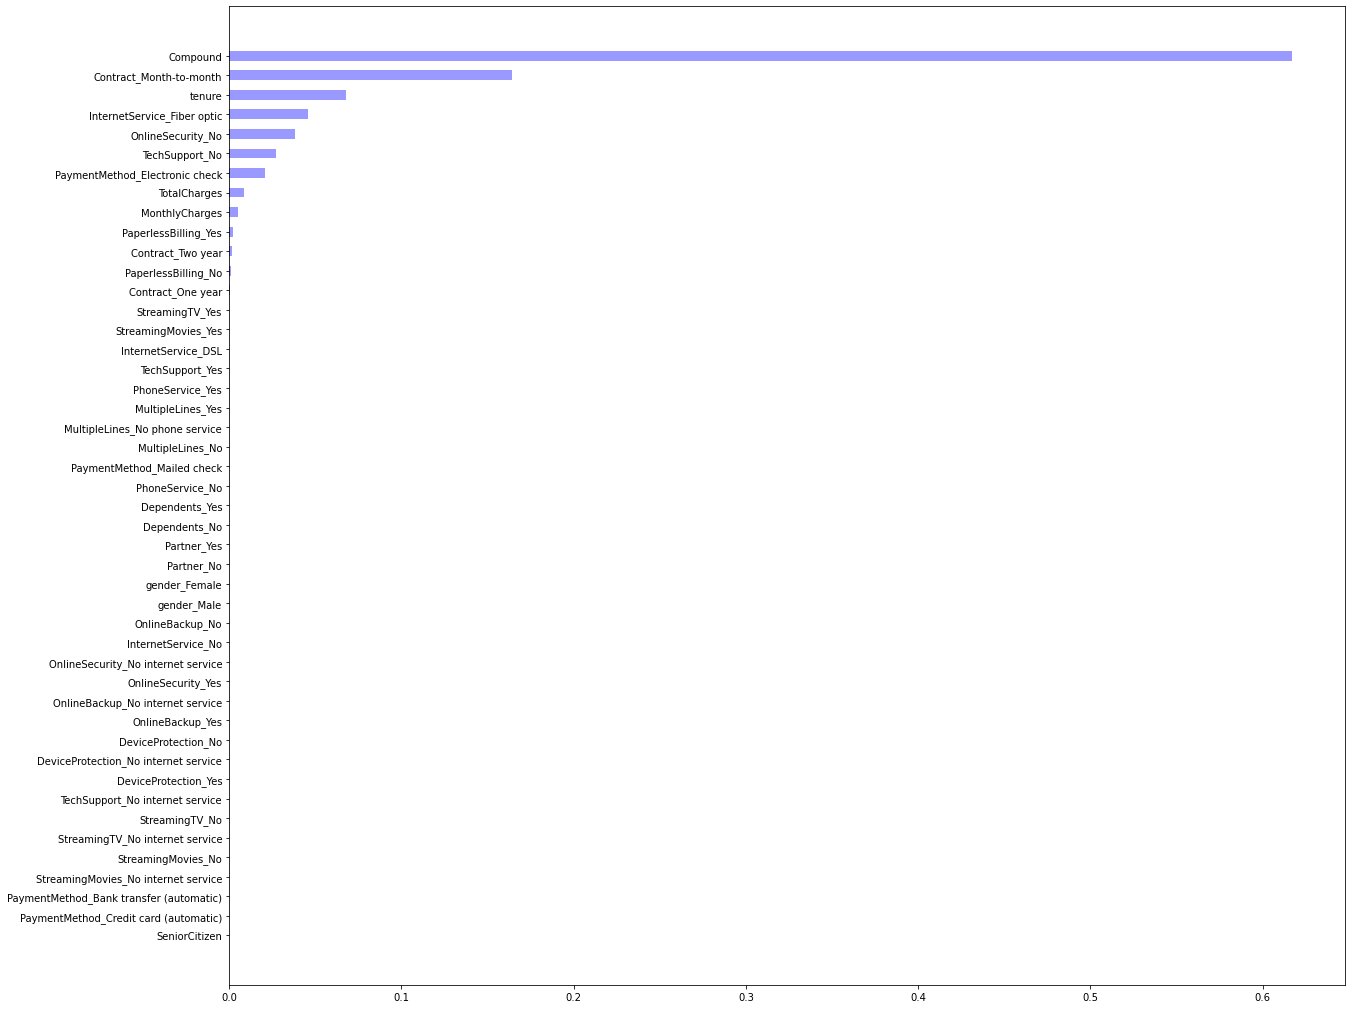

In [217]:
fig = plt.figure(figsize=(20, 18))
ax = fig.add_subplot(111)

X_f = pd.DataFrame(clf.feature_importances_, columns=["importance"])
X_f["labels"] = features
X_f.sort_values("importance", inplace=True, ascending=True)
display(X_f.head(5))

index = np.arange(len(clf.feature_importances_))
bar_width = 0.5
rects = plt.barh(index , X_f["importance"], bar_width, alpha=0.4, color='b', label='Main')
plt.yticks(index, X_f["labels"])
plt.show()

# Results



The output of this exercise is a corresponding score (representing churn propensity) for each client, as can been seen below. For insight into how these scores could be leveraged by your business, keep reading the next section.

In [170]:
X_test["prob_true"] = probs[:, 1]
X_test

C:\Users\emreo\miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,p1,q,prob_true
0,0.0,0.295775,0.701493,0.215365,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.557795,"(0.475, 0.819]",0.557795
1,0.0,0.436620,0.463682,0.229881,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.139555,"(0.121, 0.263]",0.139555
2,0.0,0.197183,0.279104,0.071619,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.300240,"(0.263, 0.475]",0.300240
3,0.0,0.084507,0.775622,0.071648,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.656439,"(0.475, 0.819]",0.656439
4,0.0,0.676056,0.819900,0.565307,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.110760,"(0.0555, 0.121]",0.110760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1402,0.0,0.042254,0.662189,0.040745,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.687503,"(0.475, 0.819]",0.687503
1403,1.0,0.309859,0.568657,0.187486,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.305258,"(0.263, 0.475]",0.305258
1404,0.0,0.408451,0.667662,0.289822,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.071343,"(0.0555, 0.121]",0.071343
1405,1.0,0.760563,0.701990,0.552331,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.071936,"(0.0555, 0.121]",0.071936


In [171]:
X_risky = X_test[X_test["prob_true"] > 0.475]
X_risky

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,p1,q,prob_true
0,0.0,0.295775,0.701493,0.215365,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.557795,"(0.475, 0.819]",0.557795
3,0.0,0.084507,0.775622,0.071648,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.656439,"(0.475, 0.819]",0.656439
8,0.0,0.000000,0.517910,0.005943,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.793336,"(0.475, 0.819]",0.793336
9,1.0,0.507042,0.824378,0.429870,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.511897,"(0.475, 0.819]",0.511897
10,0.0,0.014085,0.619900,0.019536,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.494091,"(0.475, 0.819]",0.494091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382,1.0,0.000000,0.701990,0.008078,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.807861,"(0.475, 0.819]",0.807861
1386,0.0,0.000000,0.312438,0.003560,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.583541,"(0.475, 0.819]",0.583541
1387,0.0,0.000000,0.130348,0.001448,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.546230,"(0.475, 0.819]",0.546230
1396,1.0,0.000000,0.517910,0.005943,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.798538,"(0.475, 0.819]",0.798538


In [1085]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.261-b12, mixed mode)
  Starting server from C:\Users\emreo\miniconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\emreo\AppData\Local\Temp\tmpck5ly4l5
  JVM stdout: C:\Users\emreo\AppData\Local\Temp\tmpck5ly4l5\h2o_emreo_started_from_python.out
  JVM stderr: C:\Users\emreo\AppData\Local\Temp\tmpck5ly4l5\h2o_emreo_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.6
H2O_cluster_version_age:,6 months and 24 days !!!
H2O_cluster_name:,H2O_from_python_emreo_jg813y
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.521 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"accepting new members, healthy"


In [1086]:
dfd.to_csv('churnh2o.csv') #df.to_csv cok fark yok
hp1 = h2o.import_file("churnh2o.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [1087]:
y = "Churn"
splits = hp1.split_frame(ratios = [0.8], seed = 1)
train = splits[0]
test = splits[1]

In [1088]:
# For classification
x = train.columns
y = "Churn"
x.remove(y)

In [1089]:
# For binary classification, response should be a factor
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()

In [1090]:
#aml = H2OAutoML(max_runtime_secs = 60, seed=1)
aml = H2OAutoML(max_runtime_secs = 90) #include_algos=['DRF']
aml.train(x=x, y=y, training_frame=train)
#aml.train(y = y, training_frame = train) # For regression

AutoML progress: |
19:22:17.707: AutoML: XGBoost is not available; skipping it.

████████████████████████████████████████████████████████| 100%


In [1091]:
aml.leaderboard.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_grid__1_AutoML_20210124_192217_model_5,0.937224,0.264585,0.879735,0.15721,0.28703,0.082386
GBM_5_AutoML_20210124_192217,0.937039,0.267797,0.879156,0.155376,0.287724,0.0827849
StackedEnsemble_AllModels_AutoML_20210124_192217,0.936527,0.279239,0.879906,0.152706,0.290865,0.0846027
StackedEnsemble_BestOfFamily_AutoML_20210124_192217,0.93569,0.279556,0.879069,0.149809,0.291073,0.0847233
GBM_1_AutoML_20210124_192217,0.934744,0.27194,0.877003,0.157487,0.288882,0.083453
GBM_2_AutoML_20210124_192217,0.933587,0.273209,0.875652,0.15773,0.289969,0.0840819
GBM_3_AutoML_20210124_192217,0.932083,0.276879,0.872136,0.157011,0.292782,0.0857214
GBM_grid__1_AutoML_20210124_192217_model_3,0.930889,0.283341,0.869795,0.172086,0.296791,0.0880849
GBM_4_AutoML_20210124_192217,0.929928,0.28163,0.871707,0.158404,0.29284,0.0857552
GBM_grid__1_AutoML_20210124_192217_model_2,0.929639,0.287839,0.868668,0.158851,0.297383,0.0884364


In [1092]:
aml.leader

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_grid__1_AutoML_20210124_192217_model_5


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,69.0,69.0,10648.0,3.0,3.0,3.0,5.0,8.0,7.637681




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.07592367347098428
RMSE: 0.27554250755733545
LogLoss: 0.2453495111568198
Mean Per-Class Error: 0.13090849973131258
AUC: 0.9482583371173807
AUCPR: 0.8973970157670205
Gini: 0.8965166742347614

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4304285016571947: 


,,0,1,Error,Rate
0,0,3859.0,262.0,0.0636,(262.0/4121.0)
1,1,331.0,1184.0,0.2185,(331.0/1515.0)
2,Total,4190.0,1446.0,0.1052,(593.0/5636.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.430429,0.799730,168.0
1,max f2,0.159762,0.838281,278.0
2,max f0point5,0.675383,0.845553,82.0
3,max accuracy,0.435788,0.894784,166.0
4,max precision,0.992109,1.000000,0.0
5,max recall,0.012824,1.000000,386.0
6,max specificity,0.992109,1.000000,0.0
7,max absolute_mcc,0.430429,0.728795,168.0
8,max min_per_class_accuracy,0.281389,0.866667,224.0
9,max mean_per_class_accuracy,0.296313,0.869092,217.0



Gains/Lift Table: Avg response rate: 26.88 %, avg score: 26.99 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010114,0.989082,3.720132,3.720132,1.000000,0.990399,1.000000,0.990399,0.037624,0.037624,272.013201,272.013201,0.037624
1,2,0.020050,0.987549,3.720132,3.720132,1.000000,0.988293,1.000000,0.989356,0.036964,0.074587,272.013201,272.013201,0.074587
2,3,0.030163,0.986221,3.720132,3.720132,1.000000,0.986947,1.000000,0.988548,0.037624,0.112211,272.013201,272.013201,0.112211
3,4,0.040099,0.984910,3.720132,3.720132,1.000000,0.985612,1.000000,0.987821,0.036964,0.149175,272.013201,272.013201,0.149175
4,5,0.050035,0.984001,3.720132,3.720132,1.000000,0.984473,1.000000,0.987156,0.036964,0.186139,272.013201,272.013201,0.186139
5,6,0.100071,0.976803,3.720132,3.720132,1.000000,0.980948,1.000000,0.984052,0.186139,0.372277,272.013201,272.013201,0.372277
6,7,0.150106,0.726377,3.416717,3.618994,0.918440,0.854891,0.972813,0.940998,0.170957,0.543234,241.671699,261.899367,0.537653
7,8,0.200142,0.562258,2.414128,3.317777,0.648936,0.640873,0.891844,0.865967,0.120792,0.664026,141.412822,231.777731,0.634422
8,9,0.300035,0.330903,1.718001,2.785149,0.461812,0.444157,0.748669,0.725530,0.171617,0.835644,71.800057,178.514910,0.732513
9,10,0.400106,0.178963,0.817901,2.293119,0.219858,0.251922,0.616408,0.607075,0.081848,0.917492,-18.209864,129.311907,0.707591




ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.08238599674516633
RMSE: 0.2870296095269029
LogLoss: 0.26458549981540125
Mean Per-Class Error: 0.1461327035397061
AUC: 0.9372242951060454
AUCPR: 0.8797353219168667
Gini: 0.8744485902120909

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.419072798163582: 


,,0,1,Error,Rate
0,0,3829.0,292.0,0.0709,(292.0/4121.0)
1,1,369.0,1146.0,0.2436,(369.0/1515.0)
2,Total,4198.0,1438.0,0.1173,(661.0/5636.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.419073,0.776160,172.0
1,max f2,0.194776,0.828280,266.0
2,max f0point5,0.650530,0.830680,97.0
3,max accuracy,0.432881,0.883605,167.0
4,max precision,0.993672,1.000000,0.0
5,max recall,0.008974,1.000000,392.0
6,max specificity,0.993672,1.000000,0.0
7,max absolute_mcc,0.432881,0.698043,167.0
8,max min_per_class_accuracy,0.263782,0.851735,234.0
9,max mean_per_class_accuracy,0.238373,0.853867,244.0



Gains/Lift Table: Avg response rate: 26.88 %, avg score: 26.77 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010114,0.990089,3.720132,3.720132,1.000000,0.991691,1.000000,0.991691,0.037624,0.037624,272.013201,272.013201,0.037624
1,2,0.020050,0.988543,3.720132,3.720132,1.000000,0.989211,1.000000,0.990462,0.036964,0.074587,272.013201,272.013201,0.074587
2,3,0.030163,0.986958,3.720132,3.720132,1.000000,0.987714,1.000000,0.989541,0.037624,0.112211,272.013201,272.013201,0.112211
3,4,0.040099,0.985913,3.720132,3.720132,1.000000,0.986357,1.000000,0.988752,0.036964,0.149175,272.013201,272.013201,0.149175
4,5,0.050035,0.984813,3.720132,3.720132,1.000000,0.985420,1.000000,0.988090,0.036964,0.186139,272.013201,272.013201,0.186139
5,6,0.100071,0.976723,3.720132,3.720132,1.000000,0.981424,1.000000,0.984757,0.186139,0.372277,272.013201,272.013201,0.372277
6,7,0.150106,0.720776,3.271605,3.570623,0.879433,0.854662,0.959811,0.941392,0.163696,0.535974,227.160546,257.062316,0.527723
7,8,0.200142,0.553932,2.269017,3.245222,0.609929,0.631688,0.872340,0.863966,0.113531,0.649505,126.901669,224.522154,0.614562
8,9,0.300035,0.324731,1.658531,2.716950,0.445826,0.431808,0.730337,0.720084,0.165677,0.815182,65.853132,171.695035,0.704529
9,10,0.400106,0.178725,0.930033,2.270023,0.250000,0.245221,0.610200,0.601315,0.093069,0.908251,-6.996700,127.002290,0.694953




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.8812982,0.017476244,0.8847518,0.8837622,0.85536826,0.90417033,0.87843835
1,auc,0.9376264,0.011845143,0.9423677,0.93353504,0.94066995,0.9516846,0.9198749
2,aucpr,0.88112676,0.0114864595,0.88321495,0.87823325,0.8825601,0.8968247,0.8648007
3,err,0.118701816,0.017476244,0.115248226,0.1162378,0.14463176,0.095829636,0.12156167
4,err_count,133.8,19.6901,130.0,131.0,163.0,108.0,137.0
5,f0point5,0.7797405,0.03464216,0.7562458,0.78580904,0.73692155,0.82664526,0.7930809
6,f1,0.78266764,0.006279853,0.7750865,0.78347105,0.7823765,0.7923077,0.7800963
7,f2,0.7876167,0.028964886,0.79489,0.781147,0.83380765,0.760709,0.76753
8,lift_top_group,3.7418876,0.3187588,4.072202,3.7072368,3.3541667,4.053957,3.521875
9,logloss,0.26458946,0.029061709,0.24235111,0.26806557,0.28135365,0.22961158,0.30156532



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2021-01-24 19:23:05,19.996 sec,0.0,0.443340,0.582069,0.500000,0.268808,1.000000,0.731192
1,,2021-01-24 19:23:05,20.011 sec,5.0,0.364718,0.431279,0.922119,0.847407,3.720132,0.136799
2,,2021-01-24 19:23:05,20.029 sec,10.0,0.327135,0.363348,0.933327,0.874233,3.720132,0.125976
3,,2021-01-24 19:23:05,20.060 sec,15.0,0.308456,0.324584,0.934354,0.875127,3.720132,0.124911
4,,2021-01-24 19:23:05,20.092 sec,20.0,0.298636,0.301766,0.936556,0.877970,3.720132,0.124202
5,,2021-01-24 19:23:05,20.111 sec,25.0,0.292162,0.286500,0.938413,0.881036,3.720132,0.121895
6,,2021-01-24 19:23:05,20.142 sec,30.0,0.287849,0.275856,0.940275,0.883950,3.720132,0.122072
7,,2021-01-24 19:23:05,20.158 sec,35.0,0.284624,0.268139,0.941975,0.887426,3.720132,0.114088
8,,2021-01-24 19:23:06,20.196 sec,40.0,0.282375,0.262044,0.943198,0.889326,3.720132,0.112669
9,,2021-01-24 19:23:06,20.214 sec,45.0,0.280851,0.257669,0.944133,0.890820,3.720132,0.109475



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Compound,2004.410156,1.000000,0.680712
1,Contract_Month-to-month,337.851746,0.168554,0.114737
2,OnlineSecurity_No,127.380920,0.063550,0.043259
3,tenure,122.034492,0.060883,0.041444
4,InternetService_Fiber optic,121.242470,0.060488,0.041175
5,TotalCharges,62.175167,0.031019,0.021115
6,PaymentMethod_Electronic check,49.730865,0.024811,0.016889
7,TechSupport_No,34.504326,0.017214,0.011718
8,MonthlyCharges,31.878357,0.015904,0.010826
9,C1,9.980638,0.004979,0.003389



See the whole table with table.as_data_frame()


In [1093]:
pred = aml.leader.predict(test)
pred

gbm prediction progress: |████████████████████████████████████████████████| 100%


predict,p0,p1
1,0.019354,0.980646
0,0.995178,0.00482193
1,0.309763,0.690237
0,0.99314,0.00685959
1,0.0100245,0.989975
0,0.572421,0.427579
1,0.0153335,0.984667
0,0.961044,0.0389557
1,0.0127675,0.987233
0,0.988305,0.0116951


In [1094]:
#h2o.export_file(pred, 'churnpred.csv')
#from h2o.estimators.gbm import H2OGradientBoostingEstimator
#h2o.gainsLift(aml.leader)

In [1095]:
#test.describe()

In [1096]:
perf = aml.leader.model_performance(test)
perf


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.08134890596960029
RMSE: 0.2852172960561829
LogLoss: 0.26348917495528706
Mean Per-Class Error: 0.14504375548976867
AUC: 0.9335521107821768
AUCPR: 0.8700979652323486
Gini: 0.8671042215643536

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4275786041100847: 


,,0,1,Error,Rate
0,0,963.0,79.0,0.0758,(79.0/1042.0)
1,1,82.0,272.0,0.2316,(82.0/354.0)
2,Total,1045.0,351.0,0.1153,(161.0/1396.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.427579,0.771631,146.0
1,max f2,0.262412,0.815303,218.0
2,max f0point5,0.670064,0.828000,68.0
3,max accuracy,0.548551,0.891834,105.0
4,max precision,0.992184,1.000000,0.0
5,max recall,0.013004,1.000000,384.0
6,max specificity,0.992184,1.000000,0.0
7,max absolute_mcc,0.544683,0.701302,107.0
8,max min_per_class_accuracy,0.296402,0.847458,202.0
9,max mean_per_class_accuracy,0.356711,0.854956,174.0



Gains/Lift Table: Avg response rate: 25.36 %, avg score: 26.48 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010745,0.989714,3.943503,3.943503,1.000000,0.990793,1.000000,0.990793,0.042373,0.042373,294.350282,294.350282,0.042373
1,2,0.020057,0.988305,3.943503,3.943503,1.000000,0.989089,1.000000,0.990002,0.036723,0.079096,294.350282,294.350282,0.079096
2,3,0.030086,0.986922,3.943503,3.943503,1.000000,0.987817,1.000000,0.989274,0.039548,0.118644,294.350282,294.350282,0.118644
3,4,0.040115,0.985143,3.943503,3.943503,1.000000,0.985942,1.000000,0.988441,0.039548,0.158192,294.350282,294.350282,0.158192
4,5,0.050143,0.983810,3.943503,3.943503,1.000000,0.984455,1.000000,0.987644,0.039548,0.197740,294.350282,294.350282,0.197740
5,6,0.100287,0.976626,3.943503,3.943503,1.000000,0.981147,1.000000,0.984396,0.197740,0.395480,294.350282,294.350282,0.395480
6,7,0.150430,0.695052,3.154802,3.680603,0.800000,0.827349,0.933333,0.932047,0.158192,0.553672,215.480226,268.060264,0.540237
7,8,0.200573,0.547585,2.535109,3.394229,0.642857,0.616826,0.860714,0.853242,0.127119,0.680791,153.510896,239.422922,0.643363
8,9,0.300143,0.325670,1.418526,2.738805,0.359712,0.427553,0.694511,0.712023,0.141243,0.822034,41.852620,173.880506,0.699193
9,10,0.400430,0.170042,0.732365,2.236298,0.185714,0.251243,0.567084,0.596622,0.073446,0.895480,-26.763519,123.629767,0.663235


In [349]:
import numpy as np
import pandas as pd
import tensorflow as tf
import autokeras as ak
# Initialize the structured data classifier.
clf = ak.StructuredDataClassifier(
    overwrite=True,
    max_trials=5) # It tries 3 different models.
# Feed the structured data classifier with training data.
clf.fit(
    # The path to the train.csv file.
    'C:\\Users\\emreo\\OneDrive\\Academics\\Business Analytics (DS Master)\\Python (NB Master)\\Predicting-Customer-Churn-master\\df_train.csv',
    # The name of the label column.
    'Churn',
    epochs=15)
# Predict with the best model.
predicted_y = clf.predict('C:\\Users\\emreo\\OneDrive\\Academics\\Business Analytics (DS Master)\\Python (NB Master)\\Predicting-Customer-Churn-master\\df_test.csv')
# Evaluate the best model with testing data.
print(clf.evaluate('C:\\Users\\emreo\\OneDrive\\Academics\\Business Analytics (DS Master)\\Python (NB Master)\\Predicting-Customer-Churn-master\\df_test.csv', 'Churn'))

Trial 5 Complete [00h 00m 22s]
val_accuracy: 0.4007187783718109

Best val_accuracy So Far: 0.788858950138092
Total elapsed time: 00h 02m 03s
Epoch 1/15
176/176 [==============================] - ETA: 0s - loss: 0.6612 - accuracy: 0.59 - ETA: 0s - loss: 0.6719 - accuracy: 0.62 - ETA: 0s - loss: 0.6792 - accuracy: 0.62 - ETA: 0s - loss: 0.6756 - accuracy: 0.62 - ETA: 0s - loss: 0.6557 - accuracy: 0.64 - ETA: 0s - loss: 0.6479 - accuracy: 0.65 - ETA: 0s - loss: 0.6489 - accuracy: 0.65 - ETA: 0s - loss: 0.6425 - accuracy: 0.65 - ETA: 0s - loss: 0.6427 - accuracy: 0.65 - ETA: 0s - loss: 0.6405 - accuracy: 0.66 - ETA: 0s - loss: 0.6362 - accuracy: 0.66 - ETA: 0s - loss: 0.6337 - accuracy: 0.66 - ETA: 0s - loss: 0.6306 - accuracy: 0.66 - ETA: 0s - loss: 0.6297 - accuracy: 0.67 - ETA: 0s - loss: 0.6247 - accuracy: 0.67 - ETA: 0s - loss: 0.6255 - accuracy: 0.67 - ETA: 0s - loss: 0.6240 - accuracy: 0.67 - ETA: 0s - loss: 0.6276 - accuracy: 0.67 - 1s 5ms/step - loss: 0.6276 - accuracy: 0.6764
Epo

44/44 [==============================] - ETA: 0s - loss: 0.5135 - accuracy: 0.84 - ETA: 0s - loss: 0.4335 - accuracy: 0.77 - ETA: 0s - loss: 0.4171 - accuracy: 0.79 - 0s 3ms/step - loss: 0.4171 - accuracy: 0.7967
[0.41713789105415344, 0.796730637550354]


In [7]:
print('d')

d


In [8]:
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.
